# House_prices_competition
## 주택 가격예측 경진대회
    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. this competition challenges you to predict the final price of each home.

    주택 구매자에게 꿈의 집을 설명하라고 물어보세요. 지하실 천장 높이 또는 동서 철도로의 근접성으로 시작하지 않을 것입니다. 그러나 이 경쟁 데이터 세트는 Iowa와 주 Ames에있는 주거용 주택의 거의 모든것을 묘사하는 79 가지 변수로 침실 수나 흰색 울타리보다 가격 협상에 훨씬 더 많은 영향을 미친다는 것을 증명합니다. 이 경진대회는 각각의 집에 대한 최종 가격을 예측하는 것입니다.

* 경진대회 본문 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

from pandas import DataFrame

In [2]:
train_data_path = '../train.csv'
train = pd.read_csv(train_data_path)
test_data_path = '../test.csv'
test = pd.read_csv(test_data_path)

In [3]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


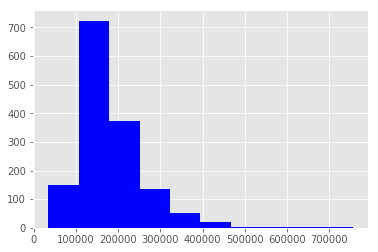

In [5]:
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [6]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [7]:
corr = numeric_features.corr()

In [8]:
print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [9]:
train.OverallQual.unique()

quality_pivot = train.pivot_table(index='OverallQual',
                                 values='SalePrice',aggfunc=np.median)

quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


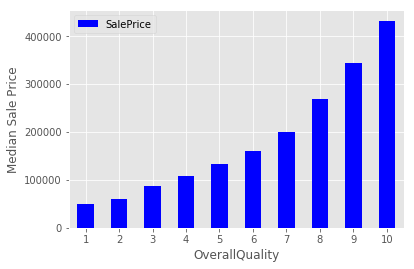

In [10]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallQuality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

plt.show()

Skew is: 0.12133506220520406


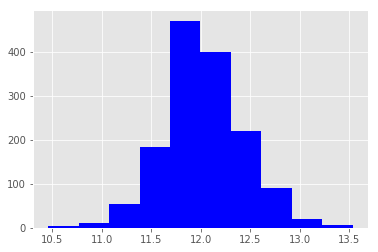

In [11]:
target = np.log(train.SalePrice)
print("Skew is:",target.skew())
plt.hist(target,color='blue')
plt.show()

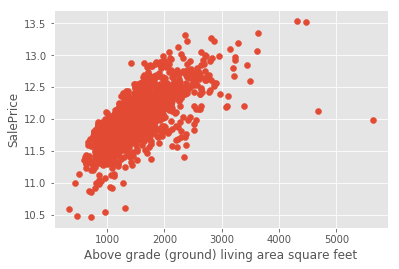

In [12]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('SalePrice')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

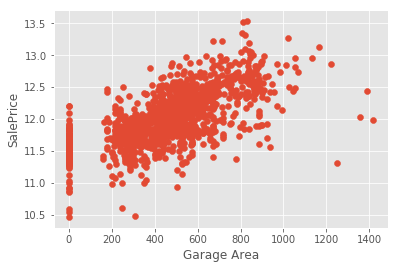

In [13]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()


In [14]:
train = train[train['GarageArea']<1200]
train = train[train['GarageArea']>0]

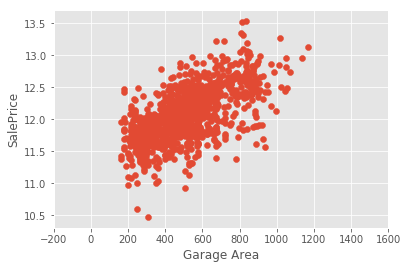

In [15]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

In [16]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

In [17]:
print("PoolQC's Unique values are:",train.PoolQC.unique())
print("MiscFeature's Unique values are:",train.MiscFeature.unique())
print("Alley's Unique values are:",train.Alley.unique())
print("Fence's Unique values are:",train.Fence.unique())
print("FireplaceQu's Unique values are:",train.FireplaceQu.unique())
print("BsmtFinType2's Unique values are:",train.BsmtFinType2.unique())
print("BsmtExposure's Unique values are:",train.BsmtExposure.unique())
print("BsmtQual's Unique values are:",train.BsmtQual.unique())
print("BsmtCond's Unique values are:",train.BsmtCond.unique())
print("BsmtFinType1's Unique values are:",train.BsmtFinType1.unique())
print("MasVnrType's Unique values are:",train.MasVnrType.unique())
print("Electrical's Unique values are:",train.Electrical.unique())

print("MasVnrArea's Unique values are:",train.MasVnrArea.unique())


PoolQC's Unique values are: [nan 'Ex' 'Fa' 'Gd']
MiscFeature's Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley's Unique values are: [nan 'Grvl' 'Pave']
Fence's Unique values are: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu's Unique values are: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
BsmtFinType2's Unique values are: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtExposure's Unique values are: ['No' 'Gd' 'Mn' 'Av' nan]
BsmtQual's Unique values are: ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond's Unique values are: ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1's Unique values are: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
MasVnrType's Unique values are: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Electrical's Unique values are: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
MasVnrArea's Unique values are: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.5

In [18]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
print("original: \n")
print(train.Street.value_counts(), "\n")

original: 

Pave    1370
Grvl       4
Name: Street, dtype: int64 



In [19]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [20]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1370
0       4
Name: enc_street, dtype: int64


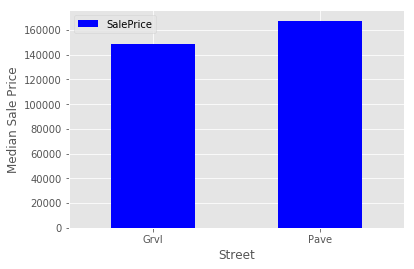

In [21]:
condition_pivot = train.pivot_table(index='Street',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Street')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

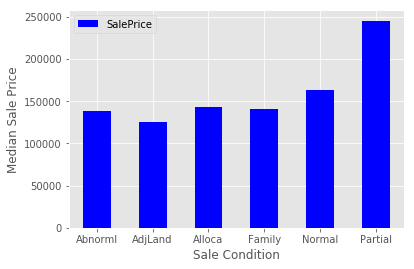

In [22]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [23]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = train.SaleCondition.apply(encode)

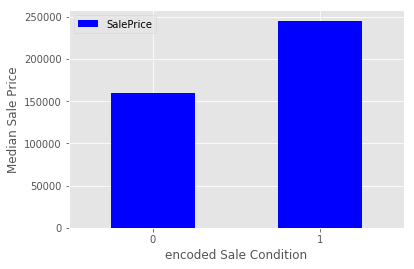

In [24]:
condition_pivot = train.pivot_table(index='enc_condition',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [25]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

sum(data.isnull().sum() != 0)

y = np.log(train.SalePrice)
X = data.drop(['SalePrice','Id'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.33)

In [27]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train,y_train)

In [28]:
print("R^2 is: \n",model.score(X_test, y_test))

predictions = model.predict(X_test)

R^2 is: 
 0.8493306666174509


RMSE is: 
 0.022221099508122566


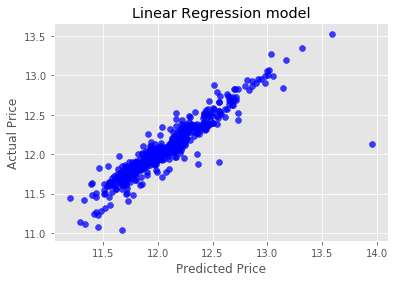

In [29]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test,predictions))


actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
           color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression model')
plt.show()

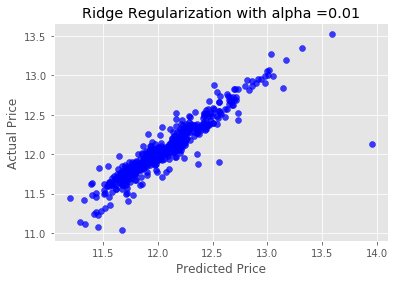

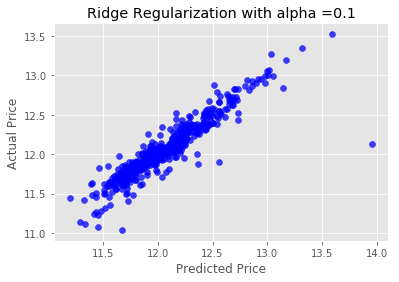

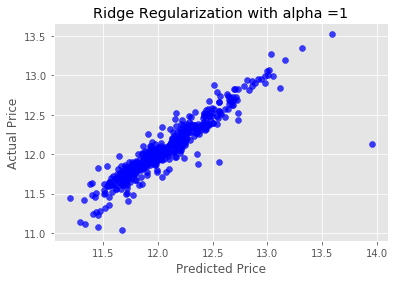

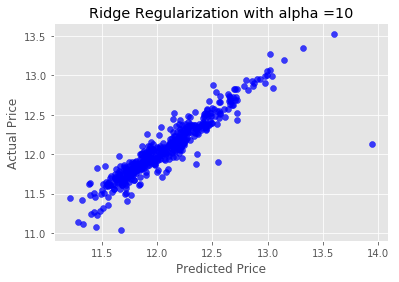

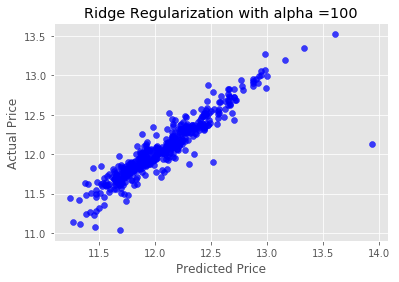

In [30]:
for i in range(-2, 3):
    alpha = 10 ** i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha ={}'.format(alpha))
    overlay = 'R^2 is : {}\n RMSE is: {}'.format(
        ridge_model.score(X_test, y_test),
        mean_squared_error(y_test, preds_ridge))
    # plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()


In [31]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = model.predict(feats)

final_predictions = np.exp(predictions)

print("original", predictions[:], "\n")
print("Final", final_predictions)

original [11.74838036 11.93508444 12.07637227 ... 12.14736946 11.67136049
 12.380755  ] 

Final [126548.43036782 152525.09882725 175671.7144004  ... 188597.32451663
 117167.57975311 238173.57659746]


In [32]:
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('submission1.csv', index=False)